# In-depth analysis: Case of Study 1

The following analysis explores the **customer preferences** and the **restaurant situation in a specific geographical location**. 

The **Section 1** displays lower triangular correlation matrix heatmaps of shopping behavioral and demographic variables, as well as the relationship between the different shopping variables. 

The **Section 2**  examines the mobility trends in the selected location. Some of the metrics included are the average distance that a typical member of the community moves on a regular day, mobility around different venues and route requests to drive, walk and transit into the city.

The **Section 3** investigates the restaurant scenario in the city: rankings, prices, popularity, locations, types of food, operations details (type of transactions allowed).

Finally, using the consumer preferences, mobility trends and restaurants features, we extract recommendations by zipcode.

In this example, we scrutinize the city of San Francisco. Why?
- The shutdown, reopening with new guidelines, and concerns for health and safety have forced many to close their doors permanently.
- Indoor dining at 25% capacity was implemented during the Fall of 2020, before the current winter lockdown. Presumibly, the next stage is going to be outdoor dining and then indoor at 25 percent again, but according to restaurateurs of the city, indoor dining at 25 percent capacity is not financially sustainable, and 50 percent is only a slight improvement.

- At the start of 2020, San Francisco issued about 3,900 permits for cafes and restaurants (of which 35 are for chains like Starbucks, Thomas said). Once we learn the number of active health permits, the total losses will be clearer. As of last April, Thomas said she saw an estimate which said that number was already down to 3,550, just two months into the shelter-in-place order.

- "The best data I think we are seeing is the credit card-spend data that the San Francisco Chamber of Commerce released showing that something like 52 percent of restaurants were not transacting any business: and that was a few months ago when we could do outdoor dining and 25 percent occupancy inside," Laurie Thomas, executive director of the Golden Gate Restaurant Association told in a recent interview with Forbes. "If restaurants don’t get any relief from the government", Thomas continued, "the restaurant closure rate could reach 85%".

- Despite the trying year, a number of restaurants did manage to open. Between March 1 and Nov. 30, San Francisco saw 299 new restaurants opening, and up to 6,212 new restaurant and food businesses opening in California since March 1, according to Yelp.

## Section 1: Consumer preferences

This section uses the Household Pulse Survey 2020 to identify consumer preferences and analyze consumer behavioral variables in a sample population of the metro-area of San Francisco Bay Area. In the survey, the customer questions are collected bi-weekly from August 19th, 2020 to December 7th, 2020 and they are related to the behavioral patterns of the participants in the last 7 days. The variables are the following:
- Purchase methods
    - Do more online purchases
    - Do more cubside pick-up purchases
    - Do more in-store purchases
- Payment methods
    - Use more contactless payment methods (apps, credit card)
    - Use more cash
- Restaurants
    - Resumed eating at restaurants
    - Avoided eating at restaurants

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import indepth_functions
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/interim/census/household_shopping_concat.csv')

In [3]:
df_summary = pd.read_csv('../data/processed/shopping_statistics_msa.csv')

In [4]:
df['GENERATION'] = df.TBIRTH_YEAR.apply(indepth_functions.generation_)

In [5]:
#metro-area code
EST_MSA = 41860
name_location = 'San Francisco Bay Area'

In [6]:
indepth_functions.summary_shopping_behavior(df_summary, EST_MSA)

PURCHASE METHODS --------------------------------------------------------
Pct surveyed people doing more online-purchases: 12    58.52
Name: Online, dtype: float64

Pct surveyed people doing more pickup-purchases: 12    3.19
Name: Pickup, dtype: float64

Pct surveyed people doing more online + pickup purchases: 12    32.44
Name: Online + Pickup, dtype: float64

Pct surveyed people doing more in-store purchases: 12    5.84
Name: In-store, dtype: float64

PAYMENT METHODS ---------------------------------------------------------
Pct surveyed people using contactless payment methods: 12    95.43
Name: CHNGHOW4, dtype: float64

Pct surveyed people using more cash: 12    4.57
Name: CHNGHOW5, dtype: float64

RESTAURANTS -------------------------------------------------------------
Pct surveyed people who resumed eating at restaurants: 12    7.3
Name: CHNGHOW7, dtype: float64

Pct surveyed people who avoided eating at restaurants: 12    92.7
Name: CHNGHOW6, dtype: float64



### 1.1 Correlation between shopping behavioral variables

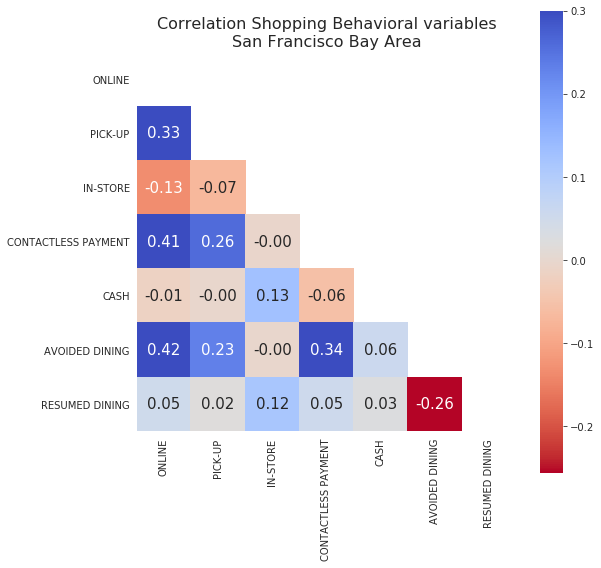

In [7]:
indepth_functions.shopping_behaviors_correlation(df, EST_MSA, name_location)

- Online purchases are related to pick-up, contactless payment methods and avoided eating at restaurants.
- In-store purchases are related to increment in the use of cash and resumed eating at restaurants.

Defining **protective** behavioral change as any conforms to pandemic-avoidance behaviors (e.g., increasing online shopping, avoiding eating at restaurants), whereas a **relaxing** behavioral change as any weaker adherence to pandemic-avoidance behaviors (e.g., increasing in-store shopping, resuming eating at restaurants), it's clear than protective behavioral changes are strongly positive correlated between themselves and negative correlated with relaxing behavioral changes. The opposite is true as well.

#### Avoid eating at restaurants

Variables more correlated to Avoid eating at restaurants: 
EEDUC         0.062126
MS            0.058755
GENERATION    0.055900
Name: CHNGHOW6, dtype: float64


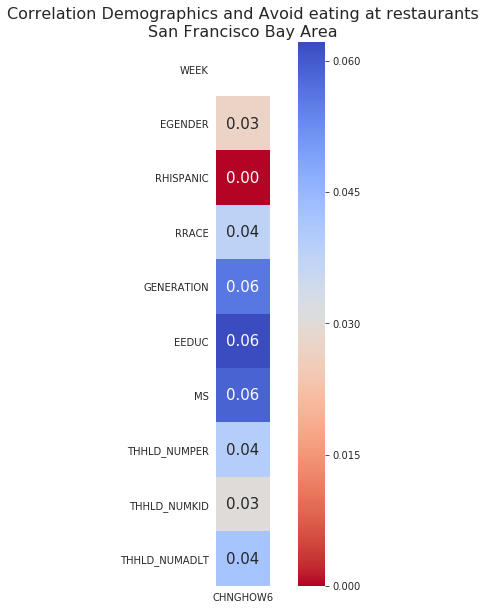

In [8]:
shopping_variable = 'CHNGHOW6'
name_variable = 'Avoid eating at restaurants'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

Avoid eating at restaurants is strongly related to the demographic categorical variables `GENERATION`, `EDDUC` and `MS`. Let's dive into those variables:

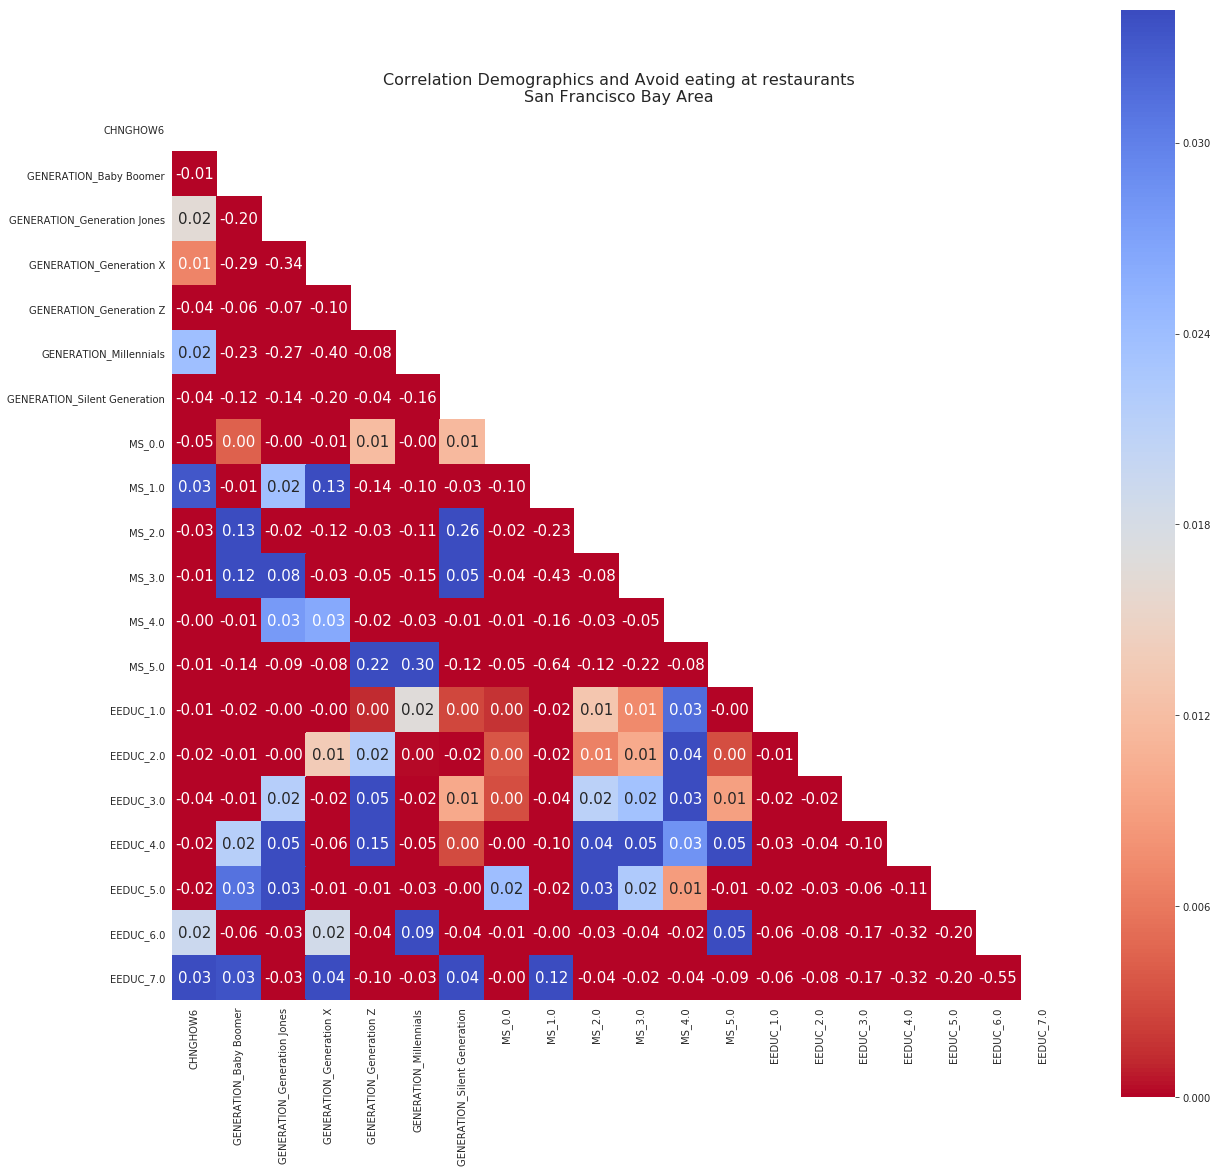

In [9]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION','MS', 'EEDUC'])

Avoid eating at restaurants correlated to MS 1, Generation Millenials, Generation X and Generation Jones and higher educational attainments (Master and PhD degrees).

Variables more correlated to Resumed eating at restaurants: 
GENERATION    0.038355
RRACE         0.037859
EEDUC         0.036555
Name: CHNGHOW7, dtype: float64


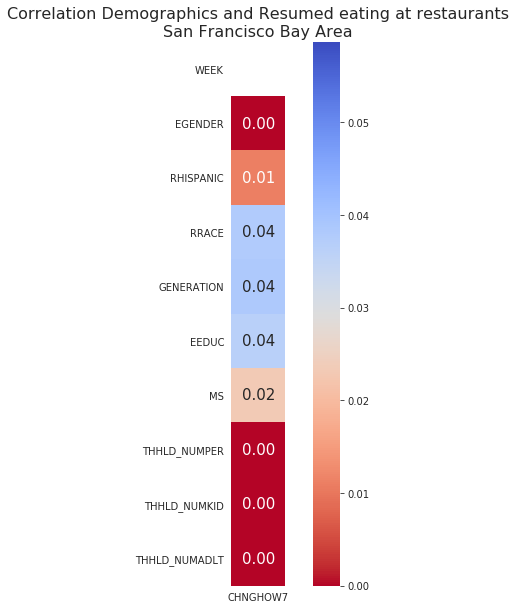

In [11]:
shopping_variable = 'CHNGHOW7'
name_variable = 'Resumed eating at restaurants'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

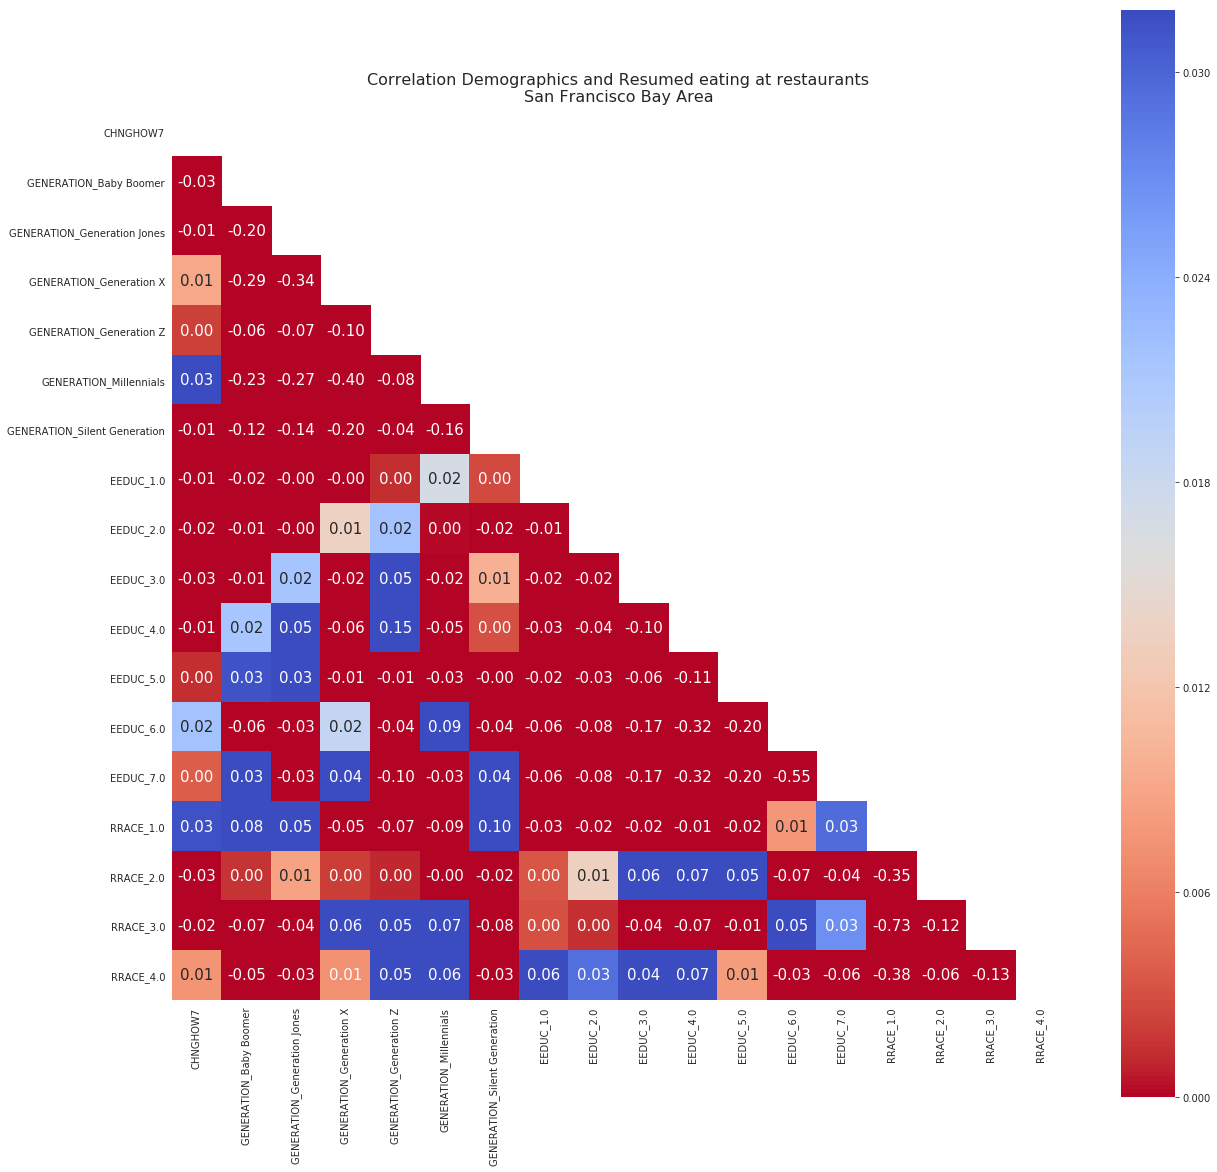

In [12]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'RRACE'])

- White people are more likely to resume eating at restaurants

Variables more correlated to Contactless paymento methods: 
EEDUC    0.080863
RRACE    0.052480
MS       0.048093
Name: CHNGHOW5, dtype: float64


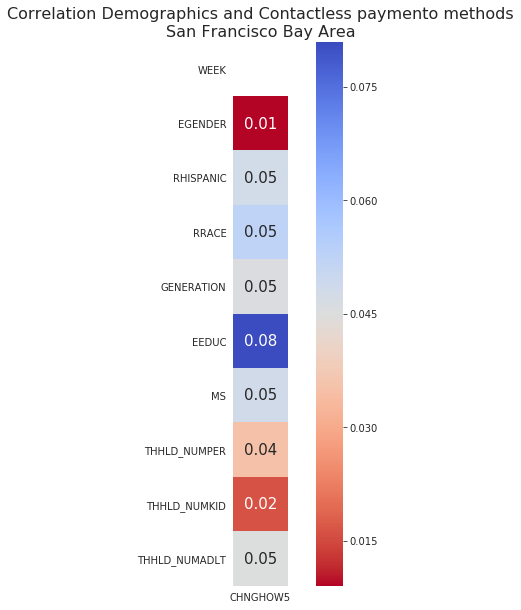

In [15]:
shopping_variable = 'CHNGHOW5'
name_variable = 'Contactless paymento methods'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

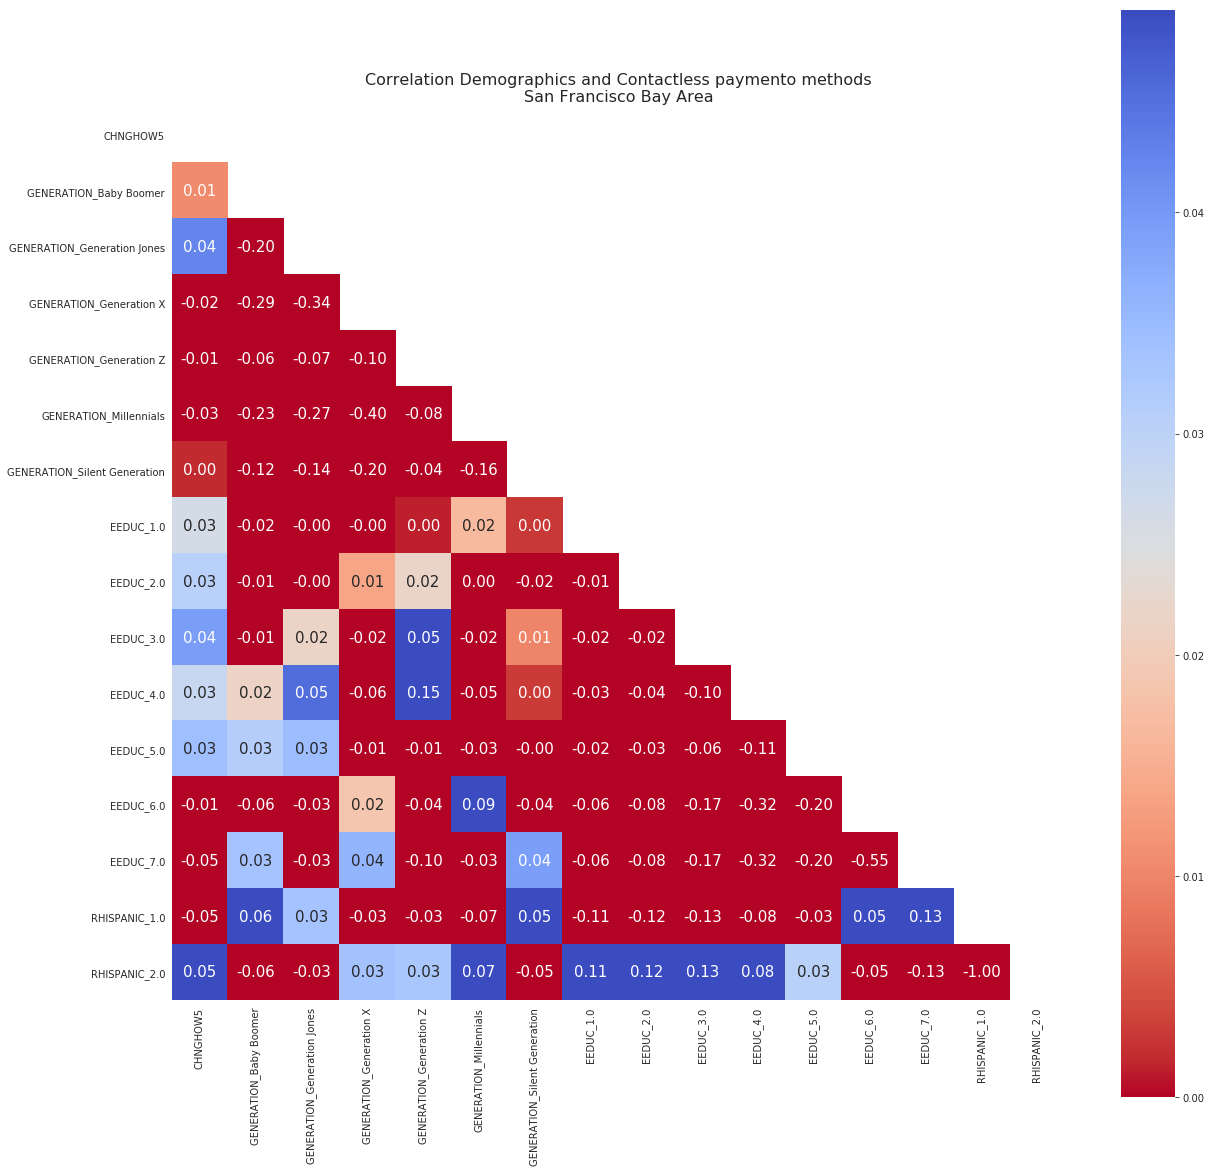

In [17]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'RHISPANIC'])

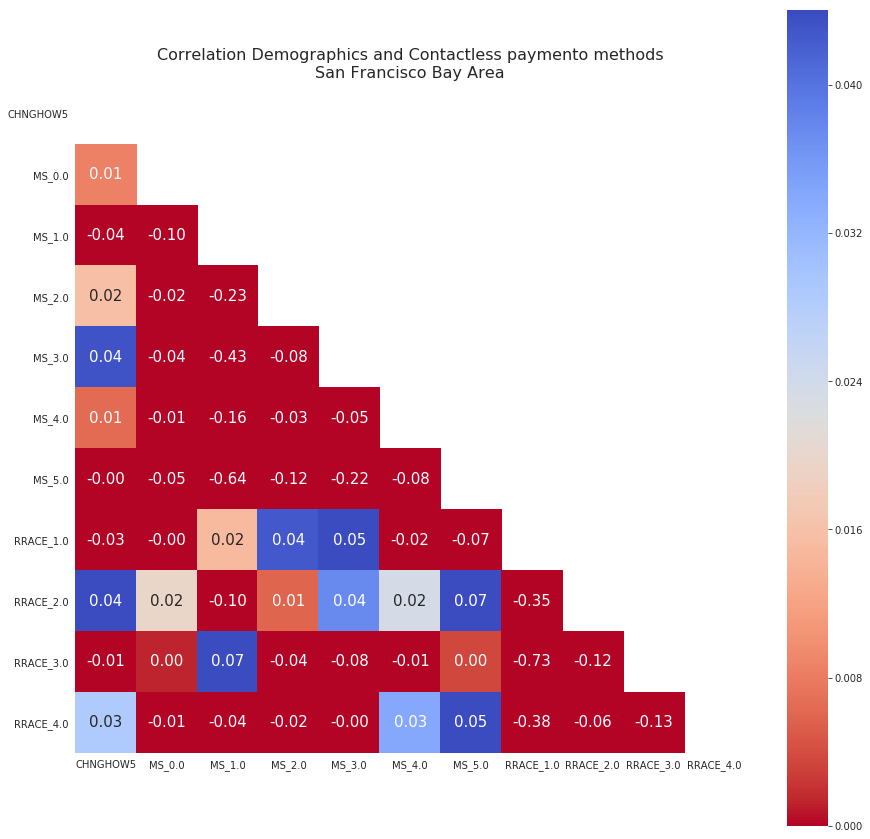

In [18]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['MS', 'RRACE'])

#### Correlated to the use of cash
- MS 3
- Race in combination
- Black community
- Hispanic community
- Educational attainment between 1 and 5
- Generation Jones and Baby-Boomers

Variables more correlated to In-store Purchases: 
EEDUC         0.096438
RHISPANIC     0.059965
GENERATION    0.056897
Name: CHNGHOW3, dtype: float64


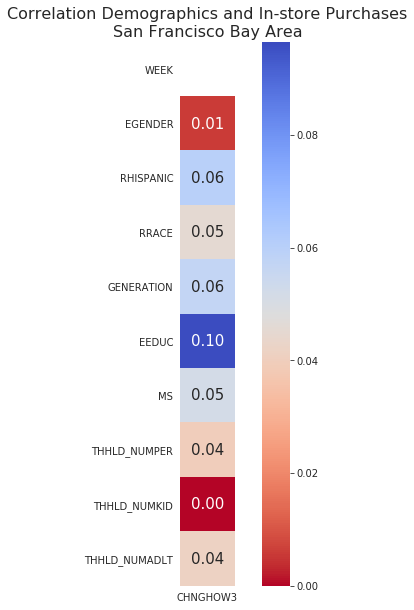

In [22]:
shopping_variable = 'CHNGHOW3'
name_variable = 'In-store Purchases'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

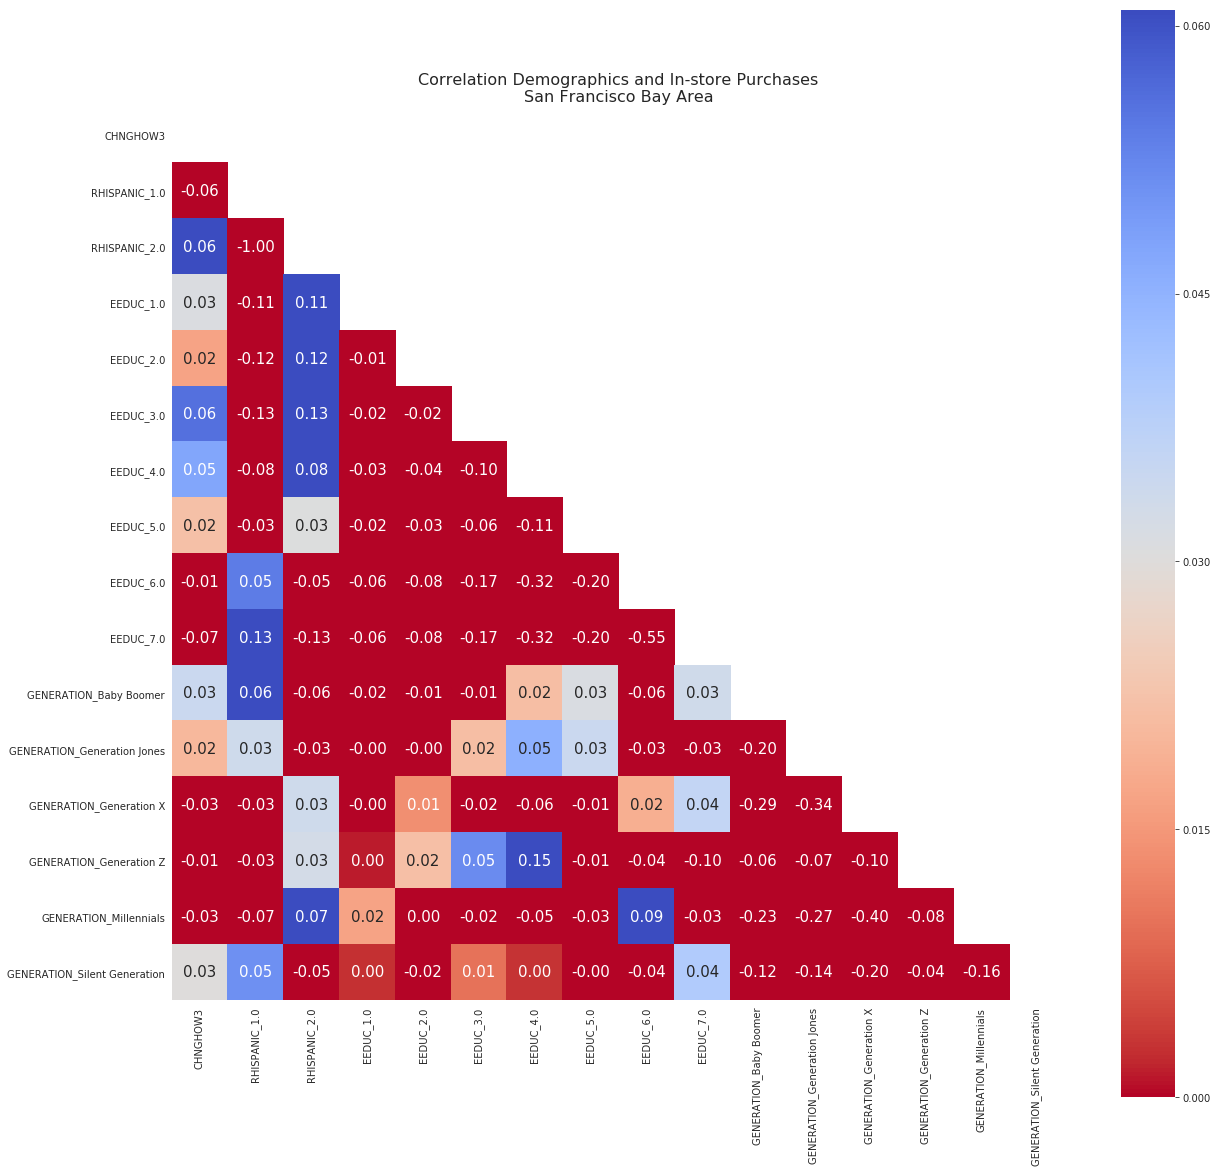

In [23]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['RHISPANIC', 'EEDUC', 'GENERATION'])

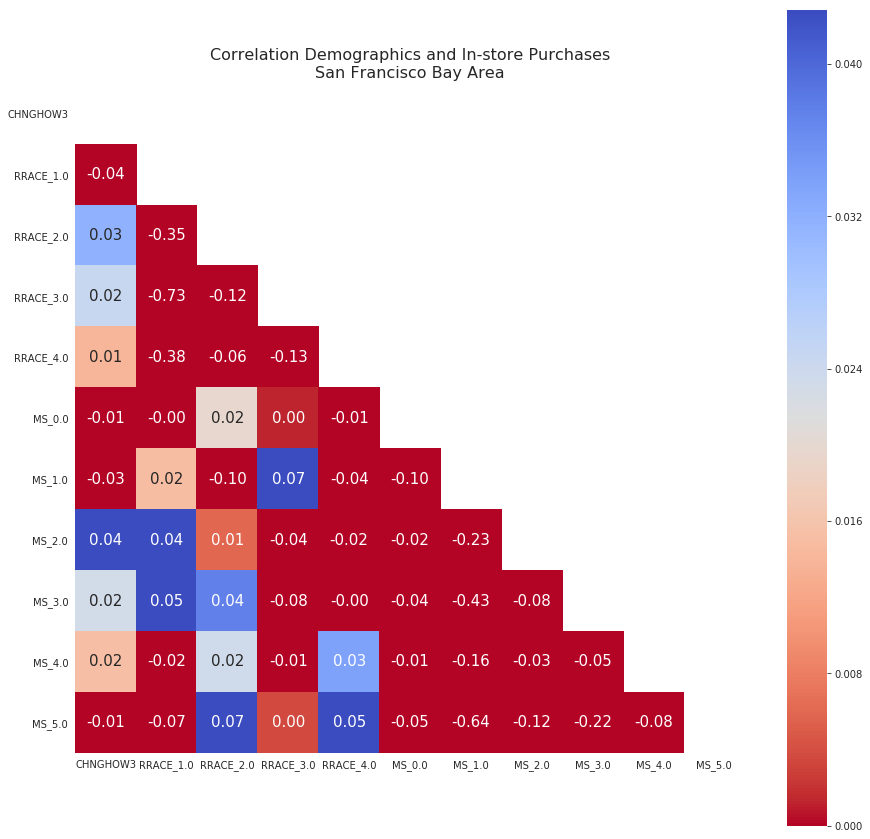

In [24]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['RRACE', 'MS'])

#### In-store Purchases

- MS 2, 3, 4
- Black, Asian and Race in combination
- Baby boomers, silent generation
- Educ 1, 3 and 4
- Hispanic community

Variables more correlated to Online Purchases: 
EEDUC         0.144190
GENERATION    0.107659
MS            0.104864
Name: CHNGHOW1, dtype: float64


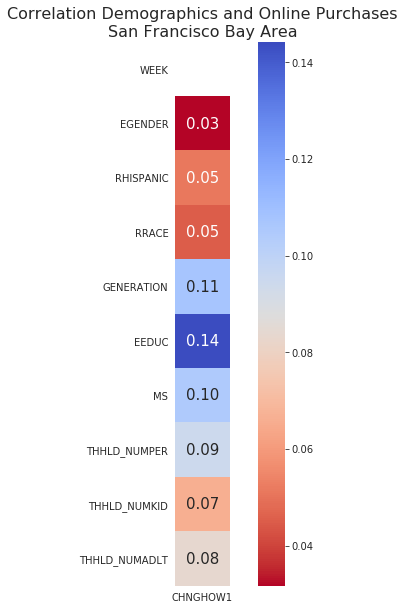

In [25]:
shopping_variable = 'CHNGHOW1'
name_variable = 'Online Purchases'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

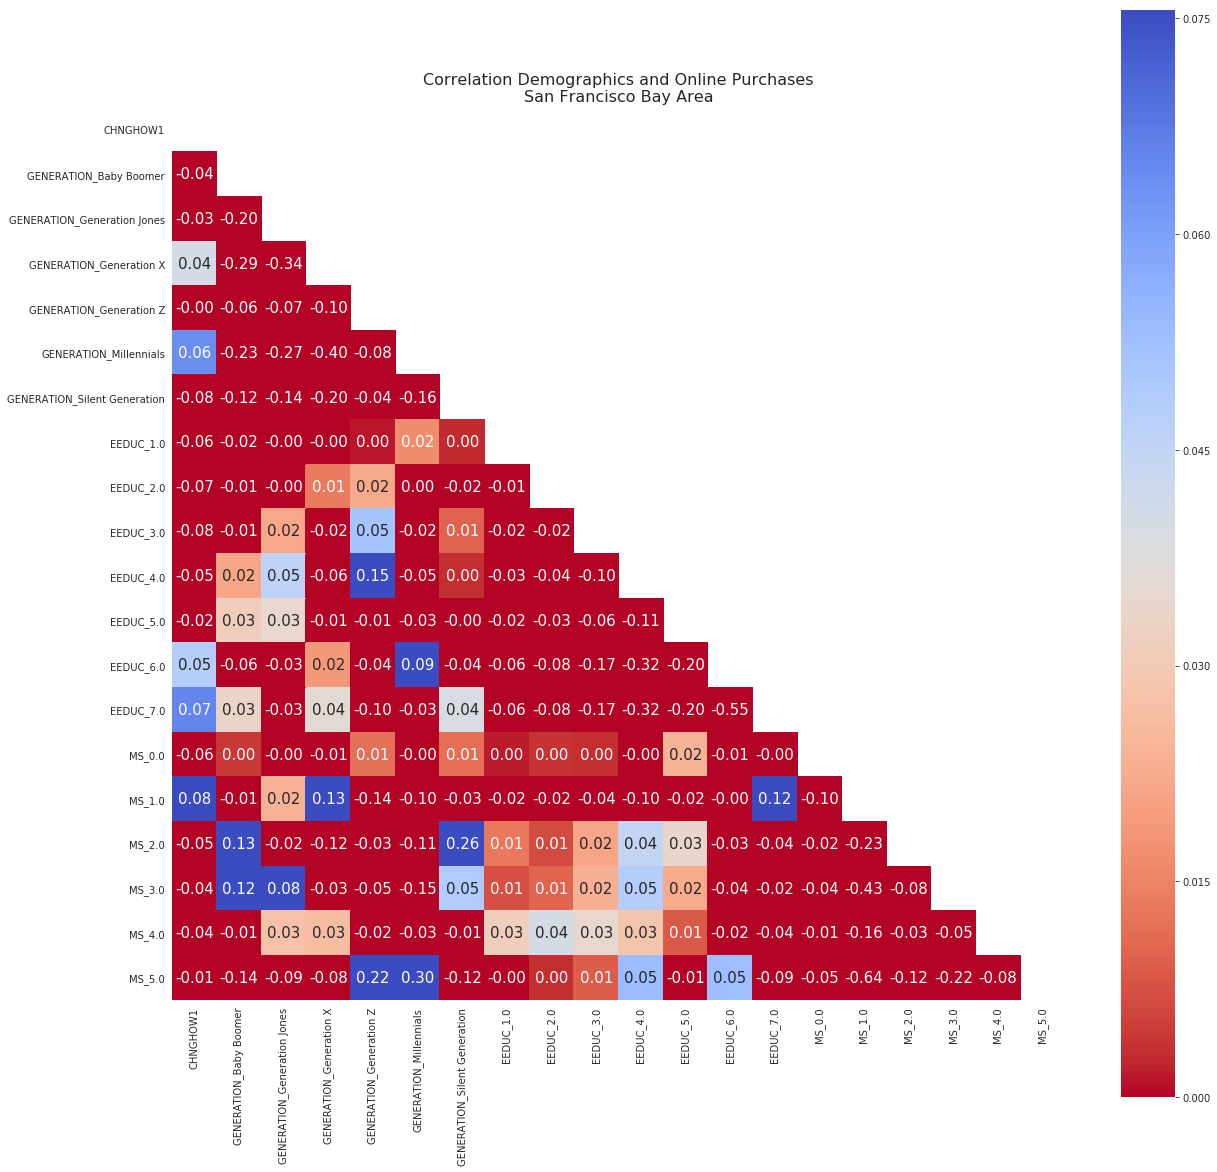

In [27]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'MS'])

- MS 1, Millenials, Generation X, EEDUC 6 and 7

## Section 2: Mobility Trends

People are moving less than 2kms daily in San Francisco county. Look for residential zones and recreational zones mobility to determine how likely are people to go there walking or driving. Compare walking and driving trends to decide if they are walking or driving more. Probably people are able to walk if the businesses are between a radio of 2 kms from their residences. The use of transit still low, and that could mean:

For high income residences and long distance delivery is the best option.
For medium income residences and medium/long distances, delivery is the best option.
Curbside works for high income if they drive to the businesses
Curbside works for and high medium incomes only if the businesses are close to the residences (into a radio of 2kms).
For instances, financial district concentrates some of the most expensives restaurants in the city. Also, those restaurants have higher ranking and number of reviews (popularity). Offices areas have less traffic that usual. Restaurants from financial district must do delivery --> Check % doing that.